These commands install three Python libraries: `nltk` for natural language processing, `camel-tools` for Arabic language processing, and `pandas` for data manipulation and analysis.


In [4]:

!pip install --upgrade --force-reinstall numpy pandas
!pip install camel-tools
!pip install nltk


  Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.3.3-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
Using cached pandas-2.3.3-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.4 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninst

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling numpy-2.3.5:
      Successfully uninstalled numpy-2.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you

In [1]:
import pandas as pd
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Install necessary libraries for Arabic text display if not already present
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
except ImportError:
    !pip install arabic-reshaper python-bidi
    import arabic_reshaper
    from bidi.algorithm import get_display

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

This code downloads NLTK’s data packages needed for splitting text into words and sentences (`punkt`) and for tagging parts of speech in English (`averaged_perceptron_tagger`).


In [5]:
import nltk
nltk.download('punkt')    # For tokenization
nltk.download('punkt_tab')  # Updated tokenizer
nltk.download('averaged_perceptron_tagger') # For English POS tagging

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
import pandas as pd
import json

# --- Load English Data ---
with open('bbc-english-news.json', 'r', encoding='utf-8') as f:
    english_data = json.load(f)

english_articles = [article['text'] for article in english_data]

# --- Load Arabic Data ---
with open('arabic-news.json', 'r', encoding='utf-8') as f:
    arabic_data = json.load(f)
arabic_articles = [article['text'] for article in arabic_data]

# --- Load Full Datasets ---
print(f"Loaded {len(english_articles)} English articles.")
print(f"Loaded {len(arabic_articles)} Arabic articles.")

# Variables for FULL datasets
all_english_articles = english_articles  # All 73 English articles
all_arabic_articles = arabic_articles    # All 69 Arabic articles

# Variables for SAMPLE (first article only - for testing)
sample_english_article = english_articles[0]
sample_arabic_article = arabic_articles[0]

print("\n--- English Sample (First Article) ---")
print(sample_english_article[:150] + "...") # Print first 150 chars
print("\n--- Arabic Sample (First Article) ---")
print(sample_arabic_article[:150] + "...") # Print first 150 chars

Loaded 74 English articles.
Loaded 69 Arabic articles.

--- English Sample (First Article) ---
Families who have children aged nine months to four years old will get free childcare if Plaid Cymru wins the next Welsh Parliament election, its lead...

--- Arabic Sample (First Article) ---
من هو مقداد فتيحة زعيم ميليشيا لواء درع الساحل في سوريا؟في أواخر فبراير شباط الماضي، ظهر مقداد فتيحة في مواقع التواصل الاجتماعي ليعلن عن تأسيس ميليشيا...



 Corpus Cleaning, Statistics & Frequency Analysis ---
✅ Datasets loaded from memory.

--- Corpus Statistics ---
Number of English Articles: 74
Number of Arabic Articles: 69
Average Words/Article (English): 526
Average Words/Article (Arabic): 931
Average Sentences/Article (English): 21
Average Sentences/Article (Arabic): 39
-------------------------

Performing word frequency analysis...


/tmp/ipython-input-2309722245.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis', orient='h')


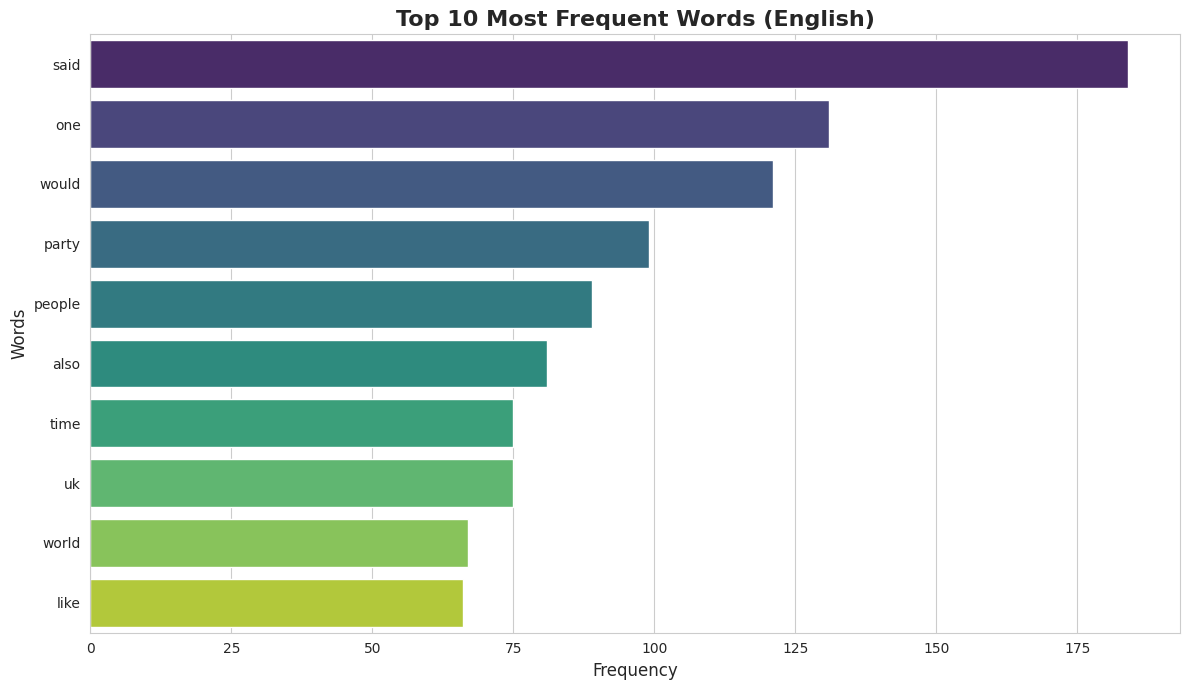

Plot generated: Top 10 Most Frequent Words (English)


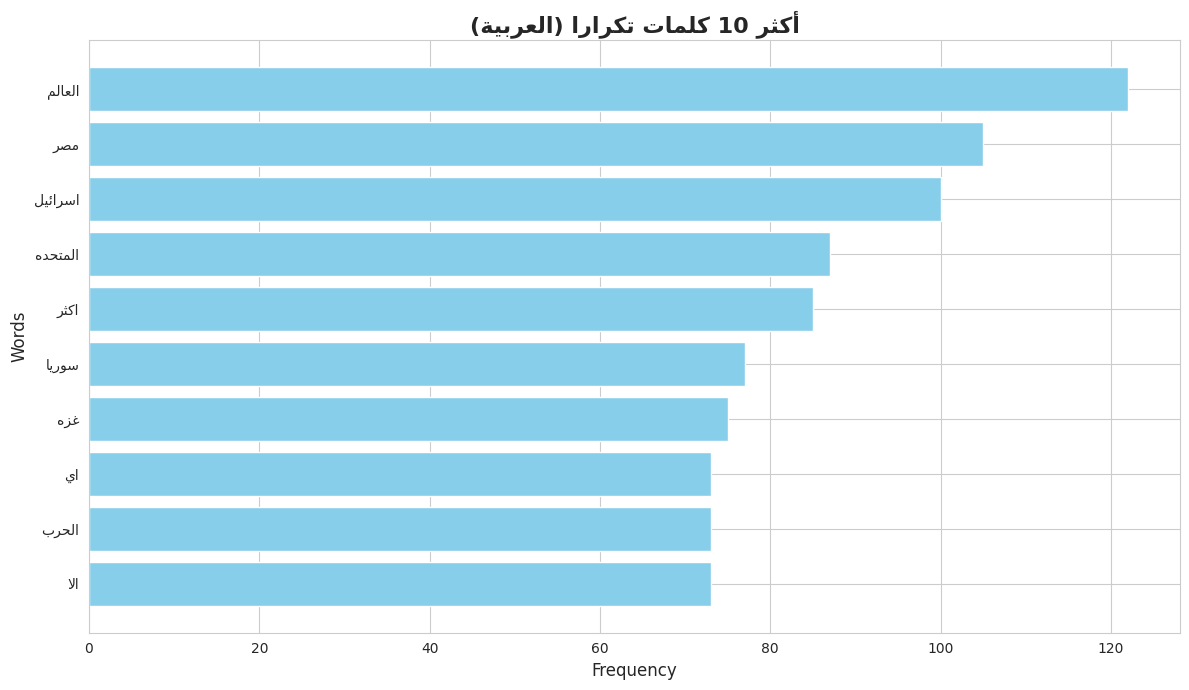

Plot generated: أكثر 10 كلمات تكراراً (العربية)

Process finished.


In [7]:
def clean_text(text, language='english'):
    """
    Cleans text by removing URLs, punctuation, numbers, and normalizing.
    """
    if text is None:
        return ""
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    if language == 'english':
        text = text.lower()
    elif language == 'arabic':
        # Arabic-specific normalization
        text = re.sub("[إأآ]", "ا", text)
        text = re.sub("ة", "ه", text)
        text = re.sub("ـ", "", text) # Remove tatweel

    return text

def get_full_cleaned_words(text_series, language='english'):
    """
    Applies cleaning and removes stop words to get a list of all words.
    """
    # Default stop words from NLTK
    stop_words = set(stopwords.words(language))

    # --- Add your custom stop words here ---
    if language == 'arabic':
        # Create a list of additional words you want to exclude
        custom_arabic_stopwords = [
            'قال', 'ايضا', 'تم', 'حيث', 'انه', 'مع', 'قد', 'ان',
            'في', 'من', 'على', 'كل', 'بعد', 'ما', 'بين', 'كما',
            'عام', 'ذلك', 'هذا', 'التي', 'الذي', 'لكن', 'كان',
            'يكون', 'دون', 'الي', 'خلال', 'الاول', 'الثاني',
            'الثالثه', 'الرابع', 'الخامس', 'السادس', 'السابع',
            'الثامن', 'التاسع', 'العاشر', 'جدا', 'مليون',
            'وقد', 'وفي', 'كانت', 'او', 'حتى','الى', 'انها','وكان'
        ]
        stop_words.update(custom_arabic_stopwords)

    all_words = []
    for text in text_series:
        cleaned_text = clean_text(text, language)
        tokens = word_tokenize(cleaned_text)
        # The filtering process will now use the extended stop word list
        words = [word for word in tokens if word.isalpha() and word not in stop_words]
        all_words.extend(words)

    return all_words

def plot_top_words(word_counts, title, filename, language='english'):
    """
    Generates and saves a bar plot for the top 10 most common words.
    """
    top_words = word_counts.most_common(10)
    words, counts = zip(*top_words)

    plt.figure(figsize=(12, 7))
    sns.set_style("whitegrid")

    if language == 'arabic':
        # Reshape labels for correct Arabic display
        labels = [get_display(arabic_reshaper.reshape(word)) for word in words]
        plt.barh(labels, counts, color='skyblue')
        plt.xlabel("Frequency", fontdict={'fontsize': 12})
        plt.ylabel("Words", fontdict={'fontsize': 12})
        plt.title(get_display(arabic_reshaper.reshape(title)), fontdict={'fontsize': 16, 'fontweight': 'bold'})
        plt.gca().invert_yaxis() # Display top word at the top
    else:
        sns.barplot(x=list(counts), y=list(words), palette='viridis', orient='h')
        plt.xlabel("Frequency", fontsize=12)
        plt.ylabel("Words", fontsize=12)
        plt.title(title, fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show() # Changed from savefig to show() so it appears inline in notebook
    print(f"Plot generated: {title}")

# --- Main Analysis Script ---

print("\n Corpus Cleaning, Statistics & Frequency Analysis ---")

# 1. Prepare DataFrames using existing list variables from the notebook
# Using 'all_english_articles' and 'all_arabic_articles' which you loaded in previous cells
if 'all_english_articles' in globals() and 'all_arabic_articles' in globals():
    df_en = pd.DataFrame({'content': all_english_articles})
    df_ar = pd.DataFrame({'content': all_arabic_articles})
    print("✅ Datasets loaded from memory.")
else:
    print("❌ Error: 'all_english_articles' or 'all_arabic_articles' not found. Please run the previous cells first.")

# 2. Statistics
print("\n--- Corpus Statistics ---")
en_article_count = len(df_en)
ar_article_count = len(df_ar)
print(f"Number of English Articles: {en_article_count}")
print(f"Number of Arabic Articles: {ar_article_count}")

# Average Word Count
df_en['word_count'] = df_en['content'].apply(lambda x: len(str(x).split()))
df_ar['word_count'] = df_ar['content'].apply(lambda x: len(str(x).split()))
print(f"Average Words/Article (English): {df_en['word_count'].mean():.0f}")
print(f"Average Words/Article (Arabic): {df_ar['word_count'].mean():.0f}")

# Average Sentence Count
def arabic_sentence_tokenize_custom(text):
    sentences = re.split(r'[.!؟\n]+', str(text))
    sentences = [s.strip() for s in sentences if len(s.strip()) > 2]
    return sentences

df_en['sent_count'] = df_en['content'].apply(lambda x: len(sent_tokenize(str(x))))
df_ar['sent_count'] = df_ar['content'].apply(lambda x: len(arabic_sentence_tokenize_custom(x)))

print(f"Average Sentences/Article (English): {df_en['sent_count'].mean():.0f}")
print(f"Average Sentences/Article (Arabic): {df_ar['sent_count'].mean():.0f}")
print("-------------------------\n")

# 3. Frequency Analysis & Plotting
print("Performing word frequency analysis...")

# English Analysis
en_words = get_full_cleaned_words(df_en['content'], 'english')
en_word_counts = Counter(en_words)
plot_top_words(en_word_counts, 'Top 10 Most Frequent Words (English)', 'english_top_words.png', 'english')

# Arabic Analysis
ar_words = get_full_cleaned_words(df_ar['content'], 'arabic')
ar_word_counts = Counter(ar_words)
plot_top_words(ar_word_counts, 'أكثر 10 كلمات تكراراً (العربية)', 'arabic_top_words.png', 'arabic')

print("\nProcess finished.")

This code loads English and Arabic news articles from JSON files, extracts their text content into lists, and prints how many articles were loaded along with a short snippet from the first article of each language for testing.


Task 1 : Tokenization
This code tokenizes and analyzes English and Arabic articles separately, counting sentences, tokens, words, and unique items, then prints summary statistics and example tokenization results.


In [8]:
import nltk
from camel_tools.tokenizers.word import simple_word_tokenize

# --- English Tokenization for ALL Articles ---
print("\n=== ENGLISH TOKENIZATION (ALL ARTICLES) ===")
total_english_sentences = 0
total_english_words = 0
total_english_tokens = 0
all_unique_english_words = set()
all_unique_english_tokens = set()

# Store first sentence for example
first_english_sentence = None
first_english_sentence_tokens = None

for idx, article in enumerate(all_english_articles):
    sentences = nltk.sent_tokenize(article)
    total_english_sentences += len(sentences)

    # Capture first sentence from first article
    if idx == 0 and len(sentences) > 0:
        first_english_sentence = sentences[0]
        first_english_sentence_tokens = nltk.word_tokenize(first_english_sentence)

    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence)
        words = [token for token in tokens if token.isalnum()]  # Only alphanumeric = words

        total_english_tokens += len(tokens)
        total_english_words += len(words)

        all_unique_english_tokens.update(tokens)
        all_unique_english_words.update(words)

print(f"📊 Total articles: {len(all_english_articles)}")
print(f"📊 Total sentences: {total_english_sentences}")
print(f"📊 Total tokens (including punctuation): {total_english_tokens}")
print(f"📊 Total words (alphanumeric only): {total_english_words}")
print(f"📊 Unique tokens: {len(all_unique_english_tokens)}")
print(f"📊 Unique words: {len(all_unique_english_words)}")
print(f"📊 Average sentences per article: {total_english_sentences / len(all_english_articles):.2f}")
print(f"📊 Average tokens per article: {total_english_tokens / len(all_english_articles):.2f}")
print(f"📊 Average words per article: {total_english_words / len(all_english_articles):.2f}")
print(f"📊 Average tokens per sentence: {total_english_tokens / total_english_sentences:.2f}")

print(f"\n📝 Example - First Sentence:")
print(f"   Text: {first_english_sentence}")
print(f"   Tokens: {first_english_sentence_tokens}")
print(f"   Token count: {len(first_english_sentence_tokens)}")


# --- Arabic Tokenization for ALL Articles ---
print("\n=== ARABIC TOKENIZATION (ALL ARTICLES) ===")
total_arabic_sentences = 0
total_arabic_words = 0
total_arabic_tokens = 0
all_unique_arabic_words = set()
all_unique_arabic_tokens = set()

# Store first sentence for example
first_arabic_sentence = None
first_arabic_sentence_tokens = None

for idx, article in enumerate(all_arabic_articles):
    sentences = nltk.sent_tokenize(article)
    total_arabic_sentences += len(sentences)

    # Capture first sentence from first article
    if idx == 0 and len(sentences) > 0:
        first_arabic_sentence = sentences[0]
        first_arabic_sentence_tokens = simple_word_tokenize(first_arabic_sentence)

    for sentence in sentences:
        tokens = simple_word_tokenize(sentence)
        words = [token for token in tokens if not token in ['،', '؛', ':', '.', '!', '?', '"', "'", '(', ')', '[', ']']]  # Filter punctuation

        total_arabic_tokens += len(tokens)
        total_arabic_words += len(words)

        all_unique_arabic_tokens.update(tokens)
        all_unique_arabic_words.update(words)

print(f"📊 Total articles: {len(all_arabic_articles)}")
print(f"📊 Total sentences: {total_arabic_sentences}")
print(f"📊 Total tokens (including punctuation): {total_arabic_tokens}")
print(f"📊 Total words (excluding punctuation): {total_arabic_words}")
print(f"📊 Unique tokens: {len(all_unique_arabic_tokens)}")
print(f"📊 Unique words: {len(all_unique_arabic_words)}")
print(f"📊 Average sentences per article: {total_arabic_sentences / len(all_arabic_articles):.2f}")
print(f"📊 Average tokens per article: {total_arabic_tokens / len(all_arabic_articles):.2f}")
print(f"📊 Average words per article: {total_arabic_words / len(all_arabic_articles):.2f}")
print(f"📊 Average tokens per sentence: {total_arabic_tokens / total_arabic_sentences:.2f}")

print(f"\n📝 Example - First Sentence:")
print(f"   Text: {first_arabic_sentence}")
print(f"   Tokens: {first_arabic_sentence_tokens}")
print(f"   Token count: {len(first_arabic_sentence_tokens)}")


=== ENGLISH TOKENIZATION (ALL ARTICLES) ===
📊 Total articles: 74
📊 Total sentences: 1541
📊 Total tokens (including punctuation): 45354
📊 Total words (alphanumeric only): 38234
📊 Unique tokens: 7382
📊 Unique words: 6718
📊 Average sentences per article: 20.82
📊 Average tokens per article: 612.89
📊 Average words per article: 516.68
📊 Average tokens per sentence: 29.43

📝 Example - First Sentence:
   Text: Families who have children aged nine months to four years old will get free childcare if Plaid Cymru wins the next Welsh Parliament election, its leader has said.
   Tokens: ['Families', 'who', 'have', 'children', 'aged', 'nine', 'months', 'to', 'four', 'years', 'old', 'will', 'get', 'free', 'childcare', 'if', 'Plaid', 'Cymru', 'wins', 'the', 'next', 'Welsh', 'Parliament', 'election', ',', 'its', 'leader', 'has', 'said', '.']
   Token count: 30

=== ARABIC TOKENIZATION (ALL ARTICLES) ===
📊 Total articles: 69
📊 Total sentences: 491
📊 Total tokens (including punctuation): 74625
📊 Total wo

# Task 2: N-gram Language Model with Laplace Smoothing

This code builds a **bigram language model** using NLTK’s language modeling tools.  
It tokenizes English text into sentences and words, then trains a model to predict word sequences using bigrams (pairs of words).  

- **Laplace smoothing** is applied to handle unseen word pairs.
- The model is trained on 80% of the data and tested on the remaining 20%.
- We evaluate the model’s performance using **perplexity**, which measures how well it predicts the test data (lower is better).
- Finally, the model can generate sample text sequences starting from a given seed word.


In [9]:
import nltk
from nltk.util import pad_sequence, ngrams
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import Laplace # Using Laplace (Add-1) smoothing

# 1. Prepare Data
# We'll use all English sentences for this.
all_english_sentences = [nltk.sent_tokenize(article) for article in english_articles]
# Flatten the list of lists
all_english_sentences = [sent for sublist in all_english_sentences for sent in sublist]

# Tokenize all sentences
tokenized_sentences = [nltk.word_tokenize(sent.lower()) for sent in all_english_sentences]

# === SHOW N-GRAM EXAMPLES ===
print("=== N-GRAM EXAMPLES ===")
print("\n--- First Sentence ---")
first_sent = tokenized_sentences[0]
print(f"Original tokens: {first_sent}")

# Show unigrams (n=1)
unigrams = list(ngrams(first_sent, 1))
print(f"\nUnigrams (1-grams): {unigrams[:10]}...")  # Show first 10

# Show bigrams (n=2)
bigrams = list(ngrams(first_sent, 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'))
print(f"\nBigrams (2-grams): {bigrams}")

# Show trigrams (n=3)
trigrams = list(ngrams(first_sent, 3, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'))
print(f"\nTrigrams (3-grams): {trigrams}")

print("\n--- Second Sentence ---")
second_sent = tokenized_sentences[1]
print(f"Original tokens: {second_sent}")

# Show bigrams for second sentence
bigrams_2 = list(ngrams(second_sent, 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'))
print(f"\nBigrams (2-grams): {bigrams_2}")

# 2. Split into Training (80%) and Test (20%)
split_point = int(len(tokenized_sentences) * 0.8)
train_sents = tokenized_sentences[:split_point]
test_sents = tokenized_sentences[split_point:]

print(f"\n=== MODEL TRAINING ===")
print(f"Total sentences: {len(tokenized_sentences)}")
print(f"Training sentences: {len(train_sents)}")
print(f"Test sentences: {len(test_sents)}")

# 3. Process Data for N-grams (n=2, for a bigram model)
n = 2
train_data, padded_sents = padded_everygram_pipeline(n, train_sents)

# 4. Train the Model
model = Laplace(n)
model.fit(train_data, padded_sents)

print(f"\n--- N-gram Model (n={n}) ---")
print(f"Vocabulary size: {len(model.vocab)}")

# 5. Evaluate Perplexity on the Test Set
# Process the test data
test_bigrams = [ngrams(sent, n, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>') for sent in test_sents]
# Flatten the list
test_data = [gram for sent in test_bigrams for gram in sent]

# Filter out None values from test_data before calculating perplexity
test_data_filtered = [gram for gram in test_data if None not in gram]

perplexity = model.perplexity(test_data_filtered)
print(f"Model Perplexity on Test Set: {perplexity:.2f}")

# 6. Text Generation Sample
print("\n=== TEXT GENERATION SAMPLES ===")
print("--- Starting with 'the' ---")
generated_text_1 = model.generate(10, text_seed=['the'])
print(f"Generated: {' '.join(generated_text_1)}")

print("\n--- Starting with 'in' ---")
generated_text_2 = model.generate(10, text_seed=['in'])
print(f"Generated: {' '.join(generated_text_2)}")

print("\n--- Random generation ---")
generated_text_3 = model.generate(10)
print(f"Generated: {' '.join(generated_text_3)}")

=== N-GRAM EXAMPLES ===

--- First Sentence ---
Original tokens: ['families', 'who', 'have', 'children', 'aged', 'nine', 'months', 'to', 'four', 'years', 'old', 'will', 'get', 'free', 'childcare', 'if', 'plaid', 'cymru', 'wins', 'the', 'next', 'welsh', 'parliament', 'election', ',', 'its', 'leader', 'has', 'said', '.']

Unigrams (1-grams): [('families',), ('who',), ('have',), ('children',), ('aged',), ('nine',), ('months',), ('to',), ('four',), ('years',)]...

Bigrams (2-grams): [('<s>', 'families'), ('families', 'who'), ('who', 'have'), ('have', 'children'), ('children', 'aged'), ('aged', 'nine'), ('nine', 'months'), ('months', 'to'), ('to', 'four'), ('four', 'years'), ('years', 'old'), ('old', 'will'), ('will', 'get'), ('get', 'free'), ('free', 'childcare'), ('childcare', 'if'), ('if', 'plaid'), ('plaid', 'cymru'), ('cymru', 'wins'), ('wins', 'the'), ('the', 'next'), ('next', 'welsh'), ('welsh', 'parliament'), ('parliament', 'election'), ('election', ','), (',', 'its'), ('its', 'lead

This code tokenizes Arabic articles into sentences and words, trains a bigram language model with Laplace smoothing on the tokenized data, evaluates its perplexity on a test set, and tries to generate a sample Arabic sentence starting with the word "العالم."


In [10]:
import nltk
import pandas as pd
from nltk.util import ngrams
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import Laplace
from nltk.tokenize import WordPunctTokenizer

# --- 1. Define the 'simple_word_tokenize' function ---
arabic_tokenizer = WordPunctTokenizer()
def simple_word_tokenize(text):
    return arabic_tokenizer.tokenize(text)

# Assuming 'arabic_articles' is already loaded
print("Tokenizing all Arabic articles using NLTK (WordPunctTokenizer)...")
all_arabic_sentences = []
for article in arabic_articles:
    # Using nltk.sent_tokenize as you requested
    sentences = nltk.sent_tokenize(article)
    all_arabic_sentences.extend(sentences)

# Tokenize each sentence into words using your requested function
tokenized_sentences_ar = [simple_word_tokenize(sent) for sent in all_arabic_sentences]
print(f"Total Arabic sentences processed: {len(tokenized_sentences_ar)}")

# === SHOW N-GRAM EXAMPLES FOR ARABIC ===
print("\n=== N-GRAM EXAMPLES (ARABIC) ===")
print("\n--- First Sentence ---")
first_sent_ar = tokenized_sentences_ar[0]
print(f"Original tokens: {first_sent_ar}")

# Show unigrams (n=1)
unigrams_ar = list(ngrams(first_sent_ar, 1))
print(f"\nUnigrams (1-grams): {unigrams_ar[:10]}...")  # Show first 10

# Show bigrams (n=2)
bigrams_ar = list(ngrams(first_sent_ar, 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'))
print(f"\nBigrams (2-grams): {bigrams_ar}")

# Show trigrams (n=3)
trigrams_ar = list(ngrams(first_sent_ar, 3, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'))
print(f"\nTrigrams (3-grams): {trigrams_ar}")

print("\n--- Second Sentence ---")
second_sent_ar = tokenized_sentences_ar[1]
print(f"Original tokens: {second_sent_ar}")

# Show bigrams for second sentence
bigrams_2_ar = list(ngrams(second_sent_ar, 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'))
print(f"\nBigrams (2-grams): {bigrams_2_ar}")

# --- 4. Split into Training (80%) and Test (20%) ---
split_point_ar = int(len(tokenized_sentences_ar) * 0.8)
train_sents_ar = tokenized_sentences_ar[:split_point_ar]
test_sents_ar = tokenized_sentences_ar[split_point_ar:]

print(f"\n=== MODEL TRAINING (ARABIC) ===")
print(f"Total sentences: {len(tokenized_sentences_ar)}")
print(f"Training sentences: {len(train_sents_ar)}")
print(f"Test sentences: {len(test_sents_ar)}")

if train_sents_ar and test_sents_ar:
    # --- 5. Process Data for N-grams (n=2, for a bigram model) ---
    n_ar = 2
    train_data_ar, padded_sents_ar = padded_everygram_pipeline(n_ar, train_sents_ar)

    # --- 6. Train the Model (Using Laplace smoothing) ---
    model_ar = Laplace(n_ar)
    model_ar.fit(train_data_ar, padded_sents_ar)
    print(f"\n--- N-gram Model (n={n_ar}) for Arabic (NLTK Baseline) ---")
    print(f"Vocabulary size: {len(model_ar.vocab)}")

    # ===================================================================
    # 7. Evaluate Perplexity on the Test Set
    # ===================================================================
    print("\nCalculating perplexity...")

    test_bigrams_ar = [ngrams(sent, n_ar,
                              pad_left=True, pad_right=True,
                              left_pad_symbol="<s>",
                              right_pad_symbol="</s>")
                       for sent in test_sents_ar]

    test_data_ar = [gram for sent in test_bigrams_ar for gram in sent]

    perplexity_ar = model_ar.perplexity(test_data_ar)
    print(f"📈 Arabic Model Perplexity on Test Set: {perplexity_ar:.2f}")

    # --- 8. Generate Sample Text ---
    print("\n=== TEXT GENERATION SAMPLES (ARABIC) ===")

    # Try with common Arabic word
    try:
        print("--- Starting with 'في' ---")
        generated_text_ar_1 = model_ar.generate(10, text_seed=['في'])
        print(f"Generated: {' '.join(['في'] + generated_text_ar_1)}")
    except Exception as e:
        print(f"Could not generate with 'في': {e}")

    try:
        print("\n--- Starting with 'من' ---")
        generated_text_ar_2 = model_ar.generate(10, text_seed=['من'])
        print(f"Generated: {' '.join(['من'] + generated_text_ar_2)}")
    except Exception as e:
        print(f"Could not generate with 'من': {e}")

    try:
        print("\n--- Random generation ---")
        generated_text_ar_3 = model_ar.generate(10)
        print(f"Generated: {' '.join(generated_text_ar_3)}")
    except Exception as e:
        print(f"Could not generate random text: {e}")

else:
    print("❌ Could not train N-gram model. Check if data was loaded and tokenized correctly.")

Tokenizing all Arabic articles using NLTK (WordPunctTokenizer)...
Total Arabic sentences processed: 491

=== N-GRAM EXAMPLES (ARABIC) ===

--- First Sentence ---
Original tokens: ['من', 'هو', 'مقداد', 'فتيحة', 'زعيم', 'ميليشيا', 'لواء', 'درع', 'الساحل', 'في', 'سوريا', '؟', 'في', 'أواخر', 'فبراير', 'شباط', 'الماضي', '،', 'ظهر', 'مقداد', 'فتيحة', 'في', 'مواقع', 'التواصل', 'الاجتماعي', 'ليعلن', 'عن', 'تأسيس', 'ميليشيا', 'عسكرية', 'جديدة', 'في', 'سوريا', 'أطلق', 'عليها', 'لواء', 'درع', 'الساحل', '،', 'وقال', 'في', 'تسجيل', 'مصو', 'ّ', 'ر', 'إنه', 'يؤسس', 'هذا', 'اللواء', 'لحماية', 'أبناء', 'الطائفة', 'العلوية', 'في', 'الساحل', 'السوري', 'ضد', 'ما', 'وصفه', 'بـ', 'تجاوزات', 'عصابات', 'الجولاني', '.', 'ولم', 'يكتف', 'فتيحة', 'بتأسيس', 'لواء', 'مسلح', 'فقط', '،', 'بل', 'دعا', 'أيضا', 'ً', 'أبناء', 'الطائفة', 'العلوية', 'إلى', 'مقاومة', 'ما', 'سماه', 'محاولات', 'نزع', 'السلاح', 'من', 'مناطقهم', '،', 'عبر', 'عمليات', 'أمنية', 'يفترض', 'أن', 'تقودها', 'السلطات', 'المركزية', '.', 'كما', 'دعا', 'إ

This code downloads the required POS tagging models, extracts and tokenizes the first English sentence from the loaded articles, then performs part-of-speech tagging on that sentence and prints the tagged words.


In [11]:
# Install the required data packages (Morphology + Disambiguation)
!camel_data -i light

The following packages will be installed: 'disambig-mle-calima-msa-r13', 'morphology-db-msa-r13', 'morphology-db-glf-01', 'dialectid-model26', 'morphology-db-lev-01', 'disambig-mle-calima-egy-r13', 'morphology-db-egy-r13', 'morphology-db-msa-s31'
Extracting package 'disambig-mle-calima-msa-r13': 100% 88.7M/88.7M [00:00<00:00, 105MB/s]
Extracting package 'morphology-db-msa-r13': 100% 40.5M/40.5M [00:00<00:00, 261MB/s]
Extracting package 'morphology-db-glf-01': 100% 7.98M/7.98M [00:00<00:00, 433MB/s]
Extracting package 'dialectid-model26': 100% 371M/371M [00:05<00:00, 70.9MB/s]
Extracting package 'morphology-db-lev-01': 100% 10.6M/10.6M [00:00<00:00, 509MB/s]
Extracting package 'disambig-mle-calima-egy-r13': 100% 27.2M/27.2M [00:00<00:00, 464MB/s]
Extracting package 'morphology-db-egy-r13': 100% 67.3M/67.3M [00:00<00:00, 358MB/s]
Extracting package 'morphology-db-msa-s31': 100% 44.8M/44.8M [00:00<00:00, 440MB/s]


In [16]:
!python -m nltk.downloader averaged_perceptron_tagger_eng

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [17]:
print("\n" + "="*70)
print("TASK 3: PART-OF-SPEECH (POS) TAGGING")
print("="*70)

# --- ENGLISH POS TAGGING ---
print("\n=== ENGLISH POS TAGGING ===")

try:
    # Get first two sentences
    first_article_sentences = nltk.sent_tokenize(english_articles[0])
    sample_sent_en_1 = first_article_sentences[0]
    sample_sent_en_2 = first_article_sentences[1] if len(first_article_sentences) > 1 else first_article_sentences[0]

    tokenized_sent_en_1 = nltk.word_tokenize(sample_sent_en_1)
    tokenized_sent_en_2 = nltk.word_tokenize(sample_sent_en_2)

    # Example 1
    print("\n🔍 Example 1 - First Sentence:")
    print(f"Original: {sample_sent_en_1}")
    print(f"\nTokens: {tokenized_sent_en_1}")

    pos_tags_en_1 = nltk.pos_tag(tokenized_sent_en_1)
    print(f"\nPOS Tags:")
    for word, tag in pos_tags_en_1:
        print(f"  {word:15} -> {tag}")

    # Example 2
    print("\n🔍 Example 2 - Second Sentence:")
    print(f"Original: {sample_sent_en_2}")
    print(f"\nTokens: {tokenized_sent_en_2}")

    pos_tags_en_2 = nltk.pos_tag(tokenized_sent_en_2)
    print(f"\nPOS Tags:")
    for word, tag in pos_tags_en_2:
        print(f"  {word:15} -> {tag}")

    # Statistics for all articles
    print("\n--- POS TAGGING STATISTICS (ALL ENGLISH ARTICLES) ---")

    all_pos_tags = []
    total_tokens = 0

    for article in english_articles:
        sentences = nltk.sent_tokenize(article)
        for sentence in sentences:
            tokens = nltk.word_tokenize(sentence)
            pos_tags = nltk.pos_tag(tokens)
            all_pos_tags.extend([tag for word, tag in pos_tags])
            total_tokens += len(tokens)

    pos_counter = Counter(all_pos_tags)

    print(f"\n📊 Total tokens tagged: {total_tokens}")
    print(f"📊 Unique POS tags: {len(pos_counter)}")
    print(f"\n📊 Top 15 Most Common POS Tags:")

    for tag, count in pos_counter.most_common(15):
        percentage = (count / total_tokens) * 100
        print(f"  {tag:10} : {count:6} occurrences ({percentage:5.2f}%)")

    # Tag meanings
    print("\n📖 Common POS Tag Meanings:")
    tag_meanings = {
        'NN': 'Noun, singular',
        'NNS': 'Noun, plural',
        'NNP': 'Proper noun, singular',
        'NNPS': 'Proper noun, plural',
        'VB': 'Verb, base form',
        'VBD': 'Verb, past tense',
        'VBG': 'Verb, gerund/present participle',
        'VBN': 'Verb, past participle',
        'VBP': 'Verb, non-3rd person singular present',
        'VBZ': 'Verb, 3rd person singular present',
        'JJ': 'Adjective',
        'JJR': 'Adjective, comparative',
        'JJS': 'Adjective, superlative',
        'RB': 'Adverb',
        'DT': 'Determiner',
        'IN': 'Preposition/subordinating conjunction',
        'CC': 'Coordinating conjunction',
        'PRP': 'Personal pronoun',
        'PRP$': 'Possessive pronoun',
        '.': 'Punctuation mark',
        ',': 'Comma'
    }

    for tag, meaning in tag_meanings.items():
        if tag in pos_counter:
            print(f"  {tag:10} = {meaning}")

except Exception as e:
    print(f"\n❌ An error occurred: {e}")

# --- ARABIC POS TAGGING (BASELINE) ---
import nltk
from collections import Counter
from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tokenizers.word import simple_word_tokenize

# =================================================================
# TASK 3: POS TAGGING (With CAMeL Tools for Arabic)
# =================================================================

print("=== TASK 3: POS TAGGING (CAMeL Tools) ===\n")

# --- 1. Load Pre-trained Model ---
try:
    mle = MLEDisambiguator.pretrained('calima-msa-r13')
    print("✅ CAMeL Tools MLE Disambiguator loaded successfully.\n")
except Exception as e:
    print("❌ Error loading CAMeL Tools data. Run '!camel_data -i calima-msa-r13' first.")
    raise e

# --- 2. Define Helper Function ---
def get_camel_pos_tags(text):
    tokens = simple_word_tokenize(text)
    # Disambiguate returns a list of ScoredAnalysis objects
    disambig = mle.disambiguate(tokens)

    pos_tags = []
    for d in disambig:
        if d.analyses:
            # We take the top analysis (most likely)
            # 'pos' is the Part-of-Speech tag (e.g., 'noun', 'adj')
            tag = d.analyses[0].analysis.get('pos', 'noun')
        else:
            tag = 'noun' # Fallback
        pos_tags.append((d.word, tag))
    return pos_tags, tokens

# --- 3. Run on Sample Sentences ---
print("--- ARABIC POS TAGGING EXAMPLES ---\n")

# Process First Sentence
# (Assuming first_sent_ar is defined from Task 1)
print("--- ARABIC POS TAGGING EXAMPLES ---\n")

# Re-initializing sentences from the raw data to ensure they are strings
try:
    # 1. Get all sentences from the first article
    first_article_sentences_ar = nltk.sent_tokenize(arabic_articles[0])

    # 2. Assign the single string variables
    first_sent_ar = first_article_sentences_ar[0]
    second_sent_ar = first_article_sentences_ar[1]

except IndexError:
    # Handles cases where an article might not have 2 sentences
    first_sent_ar = arabic_articles[0]
    second_sent_ar = arabic_articles[0]
    print("Warning: Article has fewer than two sentences; using first sentence only for examples.")

# Process First Sentence
tags_1, tokens_1 = get_camel_pos_tags(first_sent_ar)

print(f"📝 Example 1 - First Sentence:")
print(f"Original: {first_sent_ar}")

print(f"📝 Example 1 - First Sentence:")
print(f"Original: {first_sent_ar}")
print(f"Tokens: {tokens_1}")
print(f"\nPOS Tags:")
for word, tag in tags_1:
    print(f"  {word:15} -> {tag}")

# Process Second Sentence
# (Assuming second_sent_ar is defined from Task 1)
tags_2, tokens_2 = get_camel_pos_tags(second_sent_ar)

print(f"\n📝 Example 2 - Second Sentence:")
print(f"Original: {second_sent_ar}")
print(f"\nPOS Tags:")
for word, tag in tags_2:
    print(f"  {word:15} -> {tag}")

# --- 4. Statistics for ALL Arabic Articles ---
print("\n\n=== POS TAGGING STATISTICS (ALL ARABIC ARTICLES) ===")

all_pos_tags_ar = []
total_tokens_ar = 0

for article in arabic_articles:
    sentences = nltk.sent_tokenize(article)
    for sentence in sentences:
        tags, tokens = get_camel_pos_tags(sentence)
        all_pos_tags_ar.extend([tag for word, tag in tags])
        total_tokens_ar += len(tokens)

# Count POS tag frequencies
pos_counter_ar = Counter(all_pos_tags_ar)

print(f"\n📊 Total tokens tagged: {total_tokens_ar}")
print(f"📊 Unique POS tags: {len(pos_counter_ar)}")
print(f"\n📊 Top 15 Most Common POS Tags (CAMeL Tools):")

for tag, count in pos_counter_ar.most_common(15):
    percentage = (count / total_tokens_ar) * 100
    print(f"  {tag:10} : {count:6} occurrences ({percentage:5.2f}%)")

# --- 5. Explain Tags ---
print("\n\n📖 Common CAMeL Tools Tags:")
print("  noun       : Noun")
print("  noun_prop  : Proper Noun")
print("  adj        : Adjective")
print("  verb       : Verb")
print("  prep       : Preposition")
print("  conj       : Conjunction")
print("  pron       : Pronoun")
print("  digit      : Number/Digit")
print("  punc       : Punctuation")
print("\n✅ TASK 3 COMPLETE: POS tagging (baseline) finished for both languages!")


TASK 3: PART-OF-SPEECH (POS) TAGGING

=== ENGLISH POS TAGGING ===

🔍 Example 1 - First Sentence:
Original: Families who have children aged nine months to four years old will get free childcare if Plaid Cymru wins the next Welsh Parliament election, its leader has said.

Tokens: ['Families', 'who', 'have', 'children', 'aged', 'nine', 'months', 'to', 'four', 'years', 'old', 'will', 'get', 'free', 'childcare', 'if', 'Plaid', 'Cymru', 'wins', 'the', 'next', 'Welsh', 'Parliament', 'election', ',', 'its', 'leader', 'has', 'said', '.']

POS Tags:
  Families        -> NNS
  who             -> WP
  have            -> VBP
  children        -> NNS
  aged            -> VBN
  nine            -> CD
  months          -> NNS
  to              -> TO
  four            -> CD
  years           -> NNS
  old             -> JJ
  will            -> MD
  get             -> VB
  free            -> JJ
  childcare       -> NN
  if              -> IN
  Plaid           -> NNP
  Cymru           -> NNP
  wins       

This code defines a rule-based chunker to identify noun phrases (optional determiner + adjectives + nouns) in the POS-tagged English sentence, parses the sentence to extract these chunks, and prints the resulting chunk tree.


In [18]:
import nltk
from collections import Counter
# Assuming get_camel_pos_tags(text) and MLEDisambiguator are loaded from Task 3

# =================================================================
# TASK 4: PRELIMINARY PARSING (CHUNKING)
# =================================================================

print("=== TASK 4: CHUNKING ===")

# ==================== ENGLISH CHUNKING  ====================

print("\n--- ENGLISH CHUNKING ---")

# Use the POS tags from the first English sentence (from Task 3)
print(f"\n📝 Sentence: {sample_sent_en_1}")
# print(f"POS Tags: {pos_tags_en_1}") # Can omit printing all tags for brevity

# 1. Define a Chunk Grammar for English
grammar_en = "NP: {<DT>?<JJ.*>*<NN.*>+}"

print(f"\nChunk Grammar (English): {grammar_en}")

# 2. Create the Parser
chunk_parser_en = nltk.RegexpParser(grammar_en)

# 3. Parse the POS-tagged sentence
tree_en = chunk_parser_en.parse(pos_tags_en_1)

print("\n🌳 Generated Chunk Tree (English Example 1):")
print(tree_en)

# 4. Extract and display the chunks
print("\n📦 Extracted Noun Phrases:")
for subtree in tree_en.subtrees():
    if subtree.label() == 'NP':
        np_words = [word for word, pos in subtree.leaves()]
        print(f"  NP: {' '.join(np_words)}")

# ==================== ARABIC CHUNKING (CAMeL Tools Integrated) ====================

print("\n\n" + "="*70)
print("--- ARABIC CHUNKING (Using CAMeL Tags) ---")
print("="*70)

# Use the single string sentence variables (from Task 3 initialization)
print(f"\n📝 Sentence: {first_sent_ar}")

# 1. Get POS Tags using the CAMeL Tools function
pos_tags_ar_1, _ = get_camel_pos_tags(first_sent_ar)
print(f"\nPOS Tags (CAMeL): {pos_tags_ar_1}")

# 2. Define a Chunk Grammar for Arabic
# Grammar matches CAMeL tags (noun, adj, noun_prop, etc.)
grammar_ar = """
NP: {<noun.*>+<adj.*>*}
    {<digit>+}
"""

print(f"\nChunk Grammar (Arabic - using CAMeL tags): {grammar_ar}")

# 3. Create the Parser for Arabic
chunk_parser_ar = nltk.RegexpParser(grammar_ar)

# 4. Parse the POS-tagged Arabic sentence
tree_ar = chunk_parser_ar.parse(pos_tags_ar_1)

print("\n🌳 Generated Chunk Tree (Arabic Example 1):")
print(tree_ar)

# 5. Extract and display the chunks
print("\n📦 Extracted Chunks:")
chunk_count = 0
for subtree in tree_ar.subtrees():
    if subtree.label() == 'NP':
        np_words = [word for word, pos in subtree.leaves()]
        chunk_count += 1
        print(f"  NP: {' '.join(np_words)}")

if chunk_count == 0:
    print("  (No NP chunks found with current grammar)")


# Additional example with second Arabic sentence
print(f"\n\n📝 Second Sentence: {second_sent_ar}")
pos_tags_ar_2, _ = get_camel_pos_tags(second_sent_ar)
# print(f"POS Tags: {pos_tags_ar_2}") # Omit printing all tags for brevity

tree_ar_2 = chunk_parser_ar.parse(pos_tags_ar_2)

print("\n🌳 Generated Chunk Tree (Arabic Example 2):")
print(tree_ar_2)

print("\n📦 Extracted Chunks:")
chunk_count_2 = 0
for subtree in tree_ar_2.subtrees():
    if subtree.label() == 'NP':
        np_words = [word for word, pos in subtree.leaves()]
        chunk_count_2 += 1
        print(f"  NP: {' '.join(np_words)}")

if chunk_count_2 == 0:
    print("  (No NP chunks found with current grammar)")


# ==================== STATISTICS (CAMeL Tools Integrated) ====================

print("\n\n" + "="*70)
print("=== CHUNKING STATISTICS ===")
print("="*70)

# Process all English articles
print("\n--- ENGLISH CHUNKING STATISTICS ---")
all_np_chunks_en = []

for article in english_articles:
    sentences = nltk.sent_tokenize(article)
    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence)
        pos_tags = nltk.pos_tag(tokens)
        tree = chunk_parser_en.parse(pos_tags)
        for subtree in tree.subtrees():
            if subtree.label() == 'NP':
                np_words = [word for word, pos in subtree.leaves()]
                all_np_chunks_en.append(' '.join(np_words))

print(f"📊 Total NP chunks extracted: {len(all_np_chunks_en)}")
print(f"📊 Average chunks per article: {len(all_np_chunks_en) / len(english_articles):.2f}")


# Process all Arabic articles (Using CAMeL Tools Tagging)
print("\n\n--- ARABIC CHUNKING STATISTICS (CAMeL Tools) ---")
all_np_chunks_ar = []

for article in arabic_articles:
    sentences = nltk.sent_tokenize(article)
    for sentence in sentences:
        # Use the CAMeL function here for accurate tags
        pos_tags, _ = get_camel_pos_tags(sentence)

        tree = chunk_parser_ar.parse(pos_tags)
        for subtree in tree.subtrees():
            if subtree.label() == 'NP':
                np_words = [word for word, pos in subtree.leaves()]
                all_np_chunks_ar.append(' '.join(np_words))

print(f"📊 Total NP chunks extracted: {len(all_np_chunks_ar)}")
if len(all_np_chunks_ar) > 0:
    print(f"📊 Average chunks per article: {len(all_np_chunks_ar) / len(arabic_articles):.2f}")

    # Show some examples
    print(f"\n📦 Sample NP chunks (first 10):")
    for i, chunk in enumerate(all_np_chunks_ar[:10], 1):
        print(f"  {i}. {chunk}")
else:
    print("ℹ️  No chunks extracted. The grammar may need fine-tuning for specific CAMeL tag patterns.")

print("\n" + "="*70)
print("✅ Chunking complete for both English and Arabic using specialized tools!")
print("="*70)

=== TASK 4: CHUNKING ===

--- ENGLISH CHUNKING ---

📝 Sentence: Families who have children aged nine months to four years old will get free childcare if Plaid Cymru wins the next Welsh Parliament election, its leader has said.

Chunk Grammar (English): NP: {<DT>?<JJ.*>*<NN.*>+}

🌳 Generated Chunk Tree (English Example 1):
(S
  (NP Families/NNS)
  who/WP
  have/VBP
  (NP children/NNS)
  aged/VBN
  nine/CD
  (NP months/NNS)
  to/TO
  four/CD
  (NP years/NNS)
  old/JJ
  will/MD
  get/VB
  (NP free/JJ childcare/NN)
  if/IN
  (NP Plaid/NNP Cymru/NNP)
  wins/VBZ
  (NP the/DT next/JJ Welsh/NNP Parliament/NNP election/NN)
  ,/,
  its/PRP$
  (NP leader/NN)
  has/VBZ
  said/VBD
  ./.)

📦 Extracted Noun Phrases:
  NP: Families
  NP: children
  NP: months
  NP: years
  NP: free childcare
  NP: Plaid Cymru
  NP: the next Welsh Parliament election
  NP: leader


--- ARABIC CHUNKING (Using CAMeL Tags) ---

📝 Sentence: من هو مقداد فتيحة زعيم ميليشيا لواء درع الساحل في سوريا؟في أواخر فبراير شباط الماضي

In [19]:
# --- 1. Install/Download NER Models ---

# Download spaCy English model
!python -m spacy download en_core_web_sm

# Download CAMeL Tools Arabic NER data (ner-arabert)
# Note: This model is approx 500MB
!camel_data -i ner-arabert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
The following packages will be installed: 'ner-arabert'
Extracting package 'ner-arabert': 100% 542M/542M [00:01<00:00, 278MB/s]


In [20]:
import spacy
from spacy import displacy
from collections import Counter
from camel_tools.ner import NERecognizer
from camel_tools.tokenizers.word import simple_word_tokenize
import pandas as pd

# =================================================================
# TASK 5: NAMED ENTITY RECOGNITION (NER)
# =================================================================

print("\n" + "="*70)
print("TASK 5: NAMED ENTITY RECOGNITION (NER)")
print("="*70)

# -----------------------------------------------------------------
# 1. ENGLISH NER (using spaCy)
# -----------------------------------------------------------------
print("\n=== ENGLISH NER (spaCy) ===\n")

# Load English model
nlp = spacy.load("en_core_web_sm")

# --- Analyze Sample Article ---
# We use the first article, but limit to first 500 characters for readability
sample_text_en = all_english_articles[0]
doc_en = nlp(sample_text_en)

print(f"📝 Article Sample (First 300 chars):\n\"{sample_text_en[:300]}...\"\n")

print("📦 Detected Entities (Sample):")
print(f"{'Text':<20} {'Label':<10} {'Description'}")
print("-" * 60)

# Print first 10 entities found
for ent in doc_en.ents[:10]:
    print(f"{ent.text:<20} {ent.label_:<10} {spacy.explain(ent.label_)}")

# --- Statistics for ALL English Articles ---
print("\n\n📊 ENGLISH NER STATISTICS (ALL ARTICLES)")
all_ent_labels_en = []

for article in all_english_articles:
    doc = nlp(article)
    all_ent_labels_en.extend([ent.label_ for ent in doc.ents])

ent_counter_en = Counter(all_ent_labels_en)

print(f"Total Entities Found: {len(all_ent_labels_en)}")
print("Top Entity Types:")
for label, count in ent_counter_en.most_common(10):
    print(f"  {label:<10}: {count} ({spacy.explain(label)})")






TASK 5: NAMED ENTITY RECOGNITION (NER)

=== ENGLISH NER (spaCy) ===

📝 Article Sample (First 300 chars):
"Families who have children aged nine months to four years old will get free childcare if Plaid Cymru wins the next Welsh Parliament election, its leader has said. Rhun ap Iorwerth made the pledge as he told conference delegates he was ready to lead the country "right now", replacing Labour as the pa..."

📦 Detected Entities (Sample):
Text                 Label      Description
------------------------------------------------------------
nine months to four years old DATE       Absolute or relative dates or periods
Welsh Parliament     ORG        Companies, agencies, institutions, etc.
Rhun                 PERSON     People, including fictional
Iorwerth             GPE        Countries, cities, states
Labour               PERSON     People, including fictional
Labour               ORG        Companies, agencies, institutions, etc.
Wales                ORG        Companies, agencies

In [28]:
from camel_tools.ner import NERecognizer
from camel_tools.tokenizers.word import simple_word_tokenize
from collections import Counter
import sys

print("\n" + "="*70)
print("=== ARABIC NER (CAMeL Tools) ===")
print("="*70 + "\n")

# --- 1. Load Arabic NER model ---
try:
    print("Loading AraBERT NER model... (This may take a moment)")
    # CORRECTED LINE: Use 'arabert' instead of the MLE name
    ner_ar = NERecognizer.pretrained('arabert')
    print("✅ CAMeL Tools NER model (AraBERT) loaded successfully.\n")

    # --- 2. Analyze Sample Article ---
    if 'all_arabic_articles' in globals():
        sample_text_ar = all_arabic_articles[0]

        # CAMeL NER requires tokenized input
        tokens_ar = simple_word_tokenize(sample_text_ar)
        labels_ar = ner_ar.predict_sentence(tokens_ar)

        print(f"📝 Article Sample (First 300 chars):\n\"{sample_text_ar[:300]}...\"\n")

        print("📦 Detected Entities (Sample - First 15 tokens with entities):")
        print(f"{'Token':<15} {'Label'}")
        print("-" * 30)

        # Display first 15 entities found
        count = 0
        for token, label in zip(tokens_ar, labels_ar):
            if label != 'O': # Skip 'O' (Outside) tags
                print(f"{token:<15} {label}")
                count += 1
            if count >= 15:
                break

        # --- 3. Statistics for ALL Arabic Articles ---
        print("\n\n📊 ARABIC NER STATISTICS (ALL ARTICLES)")
        print(f"Processing {len(all_arabic_articles)} articles... this uses a Transformer model, so please wait.")

        all_ent_labels_ar = []

        for i, article in enumerate(all_arabic_articles):
            # Simple progress indicator
            if i % 10 == 0:
                print(f"  Processing article {i+1}/{len(all_arabic_articles)}...")

            # Tokenize
            toks = simple_word_tokenize(article)

            # Predict (limit token length if article is massive to avoid memory errors)
            # AraBERT has a limit, but camel-tools usually handles chunking.
            # If it crashes on long articles, we might need to slice `toks[:512]`
            try:
                lbls = ner_ar.predict_sentence(toks)
                # Filter out 'O' (Outside entities)
                all_ent_labels_ar.extend([l for l in lbls if l != 'O'])
            except Exception as e:
                print(f"  Skipped article {i} due to length/error.")

        ent_counter_ar = Counter(all_ent_labels_ar)

        print(f"\nTotal Entities Found: {len(all_ent_labels_ar)}")
        print("Top Entity Tags:")
        for label, count in ent_counter_ar.most_common():
            print(f"  {label:<10}: {count}")

        print("\n📖 Arabic Tag Legend:")
        print("  B-PERS / I-PERS : Person")
        print("  B-LOC  / I-LOC  : Location")
        print("  B-ORG  / I-ORG  : Organization")
        print("  B-MISC / I-MISC : Miscellaneous")
    else:
        print("❌ Error: 'all_arabic_articles' variable not found. Please run the data loading cell first.")

except Exception as e:
    print(f"❌ Error loading Arabic Model: {e}")
    print("Please ensure you ran: !camel_data -i ner-arabert")


=== ARABIC NER (CAMeL Tools) ===

Loading AraBERT NER model... (This may take a moment)


Some weights of the model checkpoint at /root/.camel_tools/data/ner/arabert were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


✅ CAMeL Tools NER model (AraBERT) loaded successfully.

📝 Article Sample (First 300 chars):
"من هو مقداد فتيحة زعيم ميليشيا لواء درع الساحل في سوريا؟في أواخر فبراير شباط الماضي، ظهر مقداد فتيحة في مواقع التواصل الاجتماعي ليعلن عن تأسيس ميليشيا عسكرية جديدة في سوريا أطلق عليها لواء درع الساحل، وقال في تسجيل مصوّر إنه يؤسس هذا اللواء لحماية أبناء الطائفة العلوية في الساحل السوري ضد ما وصفه بـ..."

📦 Detected Entities (Sample - First 15 tokens with entities):
Token           Label
------------------------------
مقداد           B-PERS
فتيحة           I-PERS
درع             B-MISC
سوريا           B-LOC
مقداد           B-PERS
فتيحة           I-PERS
سوريا           B-LOC
درع             B-MISC
الساحل          I-MISC
فتيحة           B-PERS
مقداد           B-PERS
فتيحة           I-PERS
فتيحة           B-PERS
اللاذقية        B-LOC
جبلة            B-LOC


📊 ARABIC NER STATISTICS (ALL ARTICLES)
Processing 69 articles... this uses a Transformer model, so please wait.
  Processing article 1/69...
  